In [1]:
import cv2
import numpy as np
from scipy import misc

In [2]:
i = misc.ascent()

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

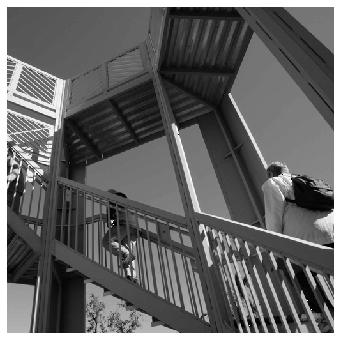

In [4]:
plt.figure(figsize = (6,6))
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

In [5]:
filter1 = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
filter2 = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]
filter3 = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

In [6]:
def apply_convolution(image, filter):
    i_transformed = np.copy(image)
    size_x = i_transformed.shape[0]
    size_y = i_transformed.shape[1]
    for x in range(1, size_x-1):
        for y in range(1, size_y-1):
            convolution = 0.0
            convolution += (image[x-1][y-1]*filter[0][0])
            convolution += (image[x][y-1]*filter[0][1])
            convolution += (image[x+1][y-1]*filter[0][2])
            convolution += (image[x-1][y]*filter[1][0])
            convolution += (image[x][y]*filter[1][1])
            convolution += (image[x+1][y]*filter[1][2])
            convolution += (image[x-1][y+1]*filter[2][0])
            convolution += (image[x][y+1]*filter[2][1])
            convolution += (image[x+1][y+1]*filter[2][2])
            if convolution<0:
                convolution = 0.0
            if convolution>255:
                convolution = 255
            i_transformed[x][y] = convolution
    return i_transformed

In [7]:
i_transformed_1 = apply_convolution(i, filter1)
i_transformed_2 = apply_convolution(i, filter2)
i_transformed_3 = apply_convolution(i, filter3)

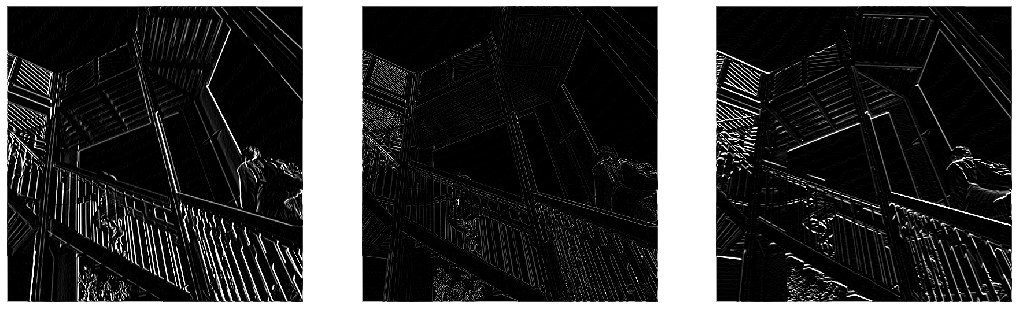

In [8]:
fig,axs = plt.subplots(1, 3 , figsize=(18,6))
axs[0].imshow(i_transformed_1)
axs[1].imshow(i_transformed_2)
axs[2].imshow(i_transformed_3)
for ax in axs:
    ax.axis('off')
    ax.grid(False)
plt.show()

In [9]:
def apply_2_pooling(image):
    new_x = int(image.shape[0]/2)
    new_y = int(image.shape[1]/2)
    newImage = np.zeros((new_x,new_y))
    for x in range(0,new_x):
        for y in range(0, new_y):
            pixels = []
            pixels.append(image[2*x][2*y])
            pixels.append(image[2*x+1][2*y])
            pixels.append(image[2*x][2*y+1])
            pixels.append(image[2*x+1][2*y+1])
            newImage[x][y] = max(pixels)
    return newImage

In [10]:
i_pooled_1 = apply_2_pooling(i_transformed_1)
i_pooled_2 = apply_2_pooling(i_transformed_2)
i_pooled_3 = apply_2_pooling(i_transformed_3)

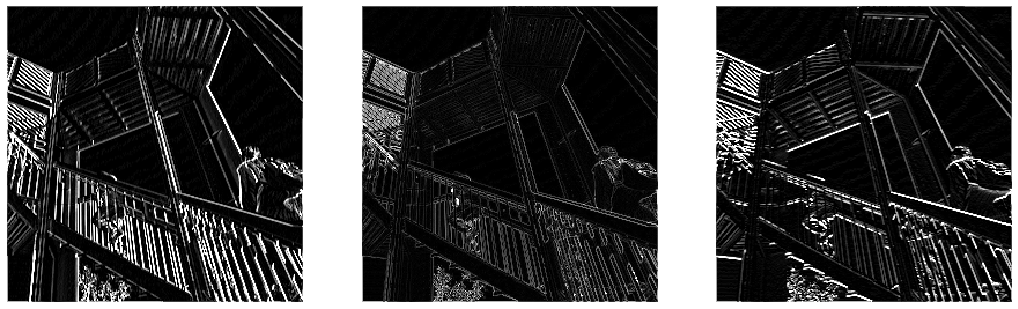

In [11]:
fig,axs = plt.subplots(1, 3 , figsize=(18,6))
axs[0].imshow(i_pooled_1)
axs[1].imshow(i_pooled_2)
axs[2].imshow(i_pooled_3)
for ax in axs:
    ax.axis('off')
    ax.grid(False)
plt.show()

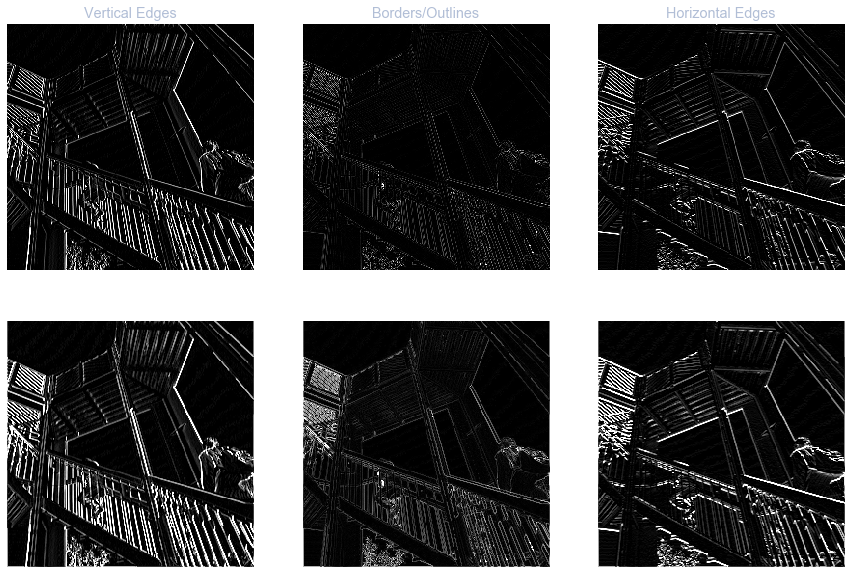

In [15]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs[0,0].imshow(i_transformed_1)
axs[0,0].set_title('Vertical Edges')
axs[0,1].imshow(i_transformed_2)
axs[0,1].set_title('Borders/Outlines')
axs[0,2].imshow(i_transformed_3)
axs[0,2].set_title('Horizontal Edges')
axs[1,0].imshow(i_pooled_1)
axs[1,1].imshow(i_pooled_2)
axs[1,2].imshow(i_pooled_3)
for ax in axs.flat:
    ax.axis('off')
    ax.grid(False)
plt.show()

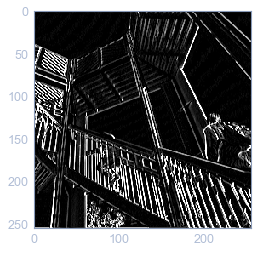

In [16]:
plt.axis('on')
plt.grid(False)
plt.imshow(newImage)
plt.show()

In [17]:
newImage_2 = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
    for y in range(0, size_y, 2):
        pixels = []
        pixels.append(i_transformed[x, y])
        pixels.append(i_transformed[x+1, y])
        pixels.append(i_transformed[x, y+1])
        pixels.append(i_transformed[x+1, y+1])
        newImage_2[int(x/2),int(y/2)] = max(pixels)